In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('nfl_data_preprocessed.csv')
raw_data.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,score_total,over_under_diff,over,under,home_diff,home_win,away_win,fav_win,fav_beat_spread
0,09/03/2000,2000,1,False,Buffalo Bills,16.0,13.0,Tennessee Titans,Buffalo Bills,-1.0,...,82,29.0,-11.0,0,1,3.0,1,0,1,1
1,09/03/2000,2000,1,False,Cleveland Browns,7.0,27.0,Jacksonville Jaguars,Jacksonville Jaguars,-10.5,...,86,34.0,-4.5,0,1,-20.0,0,1,1,1
2,09/03/2000,2000,1,False,Dallas Cowboys,14.0,41.0,Philadelphia Eagles,Dallas Cowboys,-6.0,...,32,55.0,15.5,1,0,-27.0,0,1,0,0
3,09/03/2000,2000,1,False,Green Bay Packers,16.0,20.0,New York Jets,Green Bay Packers,-2.5,...,87,36.0,-8.0,0,1,-4.0,0,1,0,0
4,09/03/2000,2000,1,False,Kansas City Chiefs,14.0,27.0,Indianapolis Colts,Indianapolis Colts,-3.5,...,51,41.0,-3.0,0,1,-13.0,0,1,1,1


### Filtering data to work with

In [3]:
df = raw_data.copy()

In [4]:
df_data = df[['spread_favorite', 'over_under_line', 'weather_wind_mph', 'score_total']]
df_data.head()

,spread_favorite,over_under_line,weather_wind_mph,score_total
0,-1.0,40.0,7.0,29.0
1,-10.5,38.5,8.0,34.0
2,-6.0,39.5,7.0,55.0
3,-2.5,44.0,13.0,36.0
4,-3.5,44.0,9.0,41.0


In [5]:
df_data.describe()

,spread_favorite,over_under_line,weather_wind_mph,score_total
count,2624.000000,2624.000000,2624.000000,2624.000000
mean,-5.392530,41.362424,9.027439,42.111280
std,3.434019,4.666900,4.734347,14.377614
min,-26.500000,30.000000,0.000000,3.000000
25%,-7.000000,37.500000,6.000000,32.000000
50%,-4.500000,41.000000,8.000000,41.000000
75%,-3.000000,44.500000,12.000000,51.000000
max,0.000000,63.000000,32.000000,106.000000


### Removing outliers

In [6]:
df_outliers = df_data.copy()

In [7]:
df_outliers['spread_favorite'] = abs(df_outliers['spread_favorite'])

In [8]:
q = df_outliers['spread_favorite'].quantile(0.99)
data_1 = df_outliers[df_outliers['spread_favorite']<q]

In [9]:
q = data_1['over_under_line'].quantile(0.99)
data_2 = data_1[data_1['over_under_line']<q]

In [10]:
q = data_2['weather_wind_mph'].quantile(0.99)
data_3 = data_2[data_2['weather_wind_mph']<q]

In [11]:
q = data_3['score_total'].quantile(0.99)
data_4 = data_3[data_3['score_total']<q]

In [12]:
df_no_outliers = data_4.reset_index(drop=True)

In [13]:
df_no_outliers.describe()

,spread_favorite,over_under_line,weather_wind_mph,score_total
count,2510.000000,2510.000000,2510.000000,2510.000000
mean,5.240637,41.184462,8.846614,41.545817
std,3.191925,4.408545,4.423476,13.607143
min,0.000000,30.000000,0.000000,6.000000
25%,3.000000,37.500000,6.000000,31.000000
50%,4.000000,41.000000,8.000000,41.000000
75%,7.000000,44.000000,12.000000,51.000000
max,15.000000,53.500000,22.000000,79.000000


### Checking the linearity

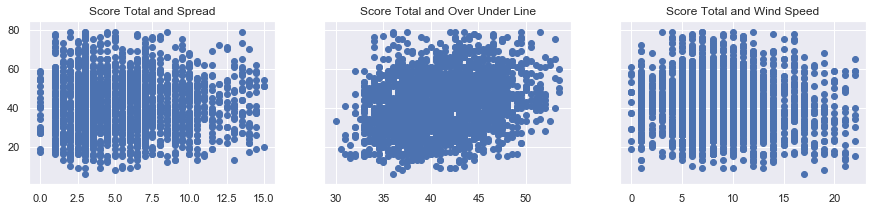

In [14]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(df_no_outliers['spread_favorite'], df_no_outliers['score_total'])
ax1.set_title('Score Total and Spread')
ax2.scatter(df_no_outliers['over_under_line'], df_no_outliers['score_total'])
ax2.set_title('Score Total and Over Under Line')
ax3.scatter(df_no_outliers['weather_wind_mph'], df_no_outliers['score_total'])
ax3.set_title('Score Total and Wind Speed')

plt.show()

### Converting score total into logirithmic form 

In [15]:
log_score_total = np.log(df_no_outliers['score_total'])
df_no_outliers['log_score_total'] = log_score_total
df_no_outliers.head()

,spread_favorite,over_under_line,weather_wind_mph,score_total,log_score_total
0,1.0,40.0,7.0,29.0,3.367296
1,10.5,38.5,8.0,34.0,3.526361
2,6.0,39.5,7.0,55.0,4.007333
3,2.5,44.0,13.0,36.0,3.583519
4,3.5,44.0,9.0,41.0,3.713572


### Checking the linearity with score total in log form

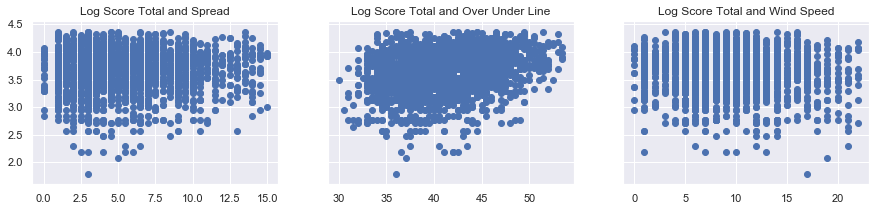

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(df_no_outliers['spread_favorite'], df_no_outliers['log_score_total'])
ax1.set_title('Log Score Total and Spread')
ax2.scatter(df_no_outliers['over_under_line'], df_no_outliers['log_score_total'])
ax2.set_title('Log Score Total and Over Under Line')
ax3.scatter(df_no_outliers['weather_wind_mph'], df_no_outliers['log_score_total'])
ax3.set_title('Log Score Total and Wind Speed')

plt.show()

### Checking for multicollinearity

In [17]:
df_no_outliers.columns.values

array(['spread_favorite', 'over_under_line', 'weather_wind_mph',
       'score_total', 'log_score_total'], dtype=object)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_no_outliers[['spread_favorite', 'over_under_line', 'weather_wind_mph']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [19]:
vif.round(2)

,VIF,Features
0,3.60,spread_favorite
1,6.82,over_under_line
2,4.55,weather_wind_mph


### Further Insight into features

In [20]:
spread_1 = df_no_outliers.loc[(df_no_outliers['spread_favorite'] >= 0) & (df_no_outliers['spread_favorite'] <=5)]
score_spread_1 = spread_1[['score_total']]

spread_2 = df_no_outliers.loc[(df_no_outliers['spread_favorite'] >= 5.1) & (df_no_outliers['spread_favorite'] <=10)]
score_spread_2 = spread_2[['score_total']]

spread_3 = df_no_outliers.loc[(df_no_outliers['spread_favorite'] >= 10.1) & (df_no_outliers['spread_favorite'] <=15)]
score_spread_3 = spread_3[['score_total']]

score_by_spread = [score_spread_1, score_spread_2, score_spread_3]

In [21]:
s_b_s = []

spread_names = ['Low Spread', 'Middle Spread', 'High Spread']

for x in score_by_spread:
    i = x.describe(percentiles=[.25, .50, .75])
    i = i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index': 'Stats'}, inplace=True)
    s_b_s.append(i)
    
s_b_s[0].rename(columns={'score_total' :spread_names[0]}, inplace=True)
s_b_s[1].rename(columns={'score_total' :spread_names[1]}, inplace=True)
s_b_s[2].rename(columns={'score_total' :spread_names[2]}, inplace=True)

df_spread_stats = s_b_s
df_spread_stats = [df.set_index('Stats') for df in df_spread_stats]
df_spread_stats = df_spread_stats[0].join(df_spread_stats[1:])
df_spread_stats

,Low Spread,Middle Spread,High Spread
Stats,,,
min,6.0,9.00,13.0
25%,31.0,31.25,33.0
50%,41.0,41.00,41.0
75%,51.0,51.00,51.0
max,79.0,79.00,79.0


In [22]:
df_spread_ranks = df_no_outliers.copy()

In [23]:
df_spread_ranks['spread_ranks'] = ''
df_spread_ranks.loc[(df_spread_ranks['spread_favorite'] >= 0) & (df_spread_ranks['spread_favorite'] <=5), ['spread_ranks']] = 'Low Spread'
df_spread_ranks.loc[(df_spread_ranks['spread_favorite'] >= 5.1) & (df_spread_ranks['spread_favorite'] <=10), ['spread_ranks']] = 'Medium Spread'
df_spread_ranks.loc[(df_spread_ranks['spread_favorite'] >= 10.1) & (df_spread_ranks['spread_favorite'] <=15), ['spread_ranks']] = 'High Spread'

Text(0.5, 1.0, 'Density and distribution of score for the spread rank')

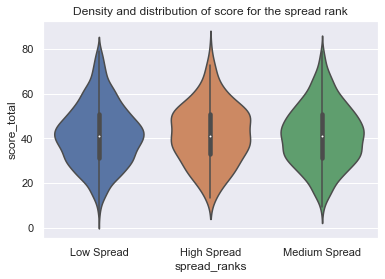

In [24]:
violin_data = df_spread_ranks

viz=sns.violinplot(data = violin_data, x = 'spread_ranks', y = 'score_total')
viz.set_title('Density and distribution of score for the spread rank')

In [25]:
df_line_ranks = df_no_outliers.copy()

In [26]:
df_line_ranks['line_ranks'] = ''
df_line_ranks.loc[(df_line_ranks['over_under_line'] >= 30) & (df_line_ranks['over_under_line'] <= 38), ['line_ranks']] = 'Low Line'
df_line_ranks.loc[(df_line_ranks['over_under_line'] >= 38.1) & (df_line_ranks['over_under_line'] <= 46), ['line_ranks']] = 'Medium Line'
df_line_ranks.loc[(df_line_ranks['over_under_line'] >= 46.1) & (df_line_ranks['over_under_line'] <= 54), ['line_ranks']] = 'High Line'

In [27]:
line_1 = df_line_ranks.loc[df_line_ranks['line_ranks'] == 'Low Line']
score_line_1 = line_1[['score_total']]

line_2 = df_line_ranks.loc[df_line_ranks['line_ranks'] == 'Medium Line']
score_line_2 = line_2[['score_total']]

line_3 = df_line_ranks.loc[df_line_ranks['line_ranks'] == 'High Line']
score_line_3 = line_3[['score_total']]

score_by_line = [score_line_1, score_line_2 , score_line_3]

In [28]:
s_b_l = []

val_names = ['Low Line', 'Medium Line', 'High Line']

for x in score_by_line:
    i = x.describe(percentiles=[.25, .50, .75])
    i = i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index': 'Stats'}, inplace=True)
    s_b_l.append(i)
    
s_b_l[0].rename(columns={'score_total' :val_names[0]}, inplace=True)
s_b_l[1].rename(columns={'score_total' :val_names[1]}, inplace=True)
s_b_l[2].rename(columns={'score_total' :val_names[2]}, inplace=True)

df_line_stats = s_b_l
df_line_stats = [df.set_index('Stats') for df in df_line_stats]
df_line_stats = df_line_stats[0].join(df_line_stats[1:])
df_line_stats

,Low Line,Medium Line,High Line
Stats,,,
min,6.0,9.0,15.0
25%,27.0,33.0,40.0
50%,37.0,42.0,47.0
75%,47.0,51.0,56.5
max,79.0,79.0,79.0


Text(0.5, 1.0, 'Density and distribution of score total for the line ranks')

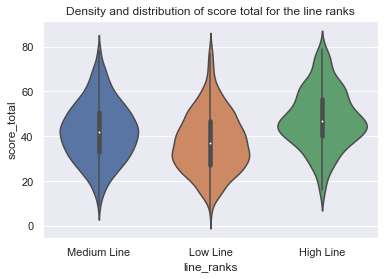

In [29]:
violin_data = df_line_ranks

viz=sns.violinplot(data = violin_data, x = 'line_ranks', y = 'score_total')
viz.set_title('Density and distribution of score total for the line ranks')

In [30]:
df_wind_ranks = df_no_outliers.copy()

In [31]:
df_wind_ranks['wind_ranks'] = ''
df_wind_ranks.loc[(df_wind_ranks['weather_wind_mph'] >= 0) & (df_wind_ranks['weather_wind_mph'] <= 7.4), ['wind_ranks']] = 'Low Wind'
df_wind_ranks.loc[(df_wind_ranks['weather_wind_mph'] >= 7.5) & (df_wind_ranks['weather_wind_mph'] <= 14.8 ), ['wind_ranks']] = 'Medium Wind'
df_wind_ranks.loc[(df_wind_ranks['weather_wind_mph'] >= 14.9) & (df_wind_ranks['weather_wind_mph'] <= 22.2 ), ['wind_ranks']] = 'High Wind'

In [32]:
wind_1 = df_wind_ranks.loc[df_wind_ranks['wind_ranks'] == 'Low Wind']
score_wind_1 = wind_1[['score_total']]

wind_2 = df_wind_ranks.loc[df_wind_ranks['wind_ranks'] == 'Medium Wind']
score_wind_2 = wind_2[['score_total']]

wind_3 = df_wind_ranks.loc[df_wind_ranks['wind_ranks'] == 'High Wind']
score_wind_3 = wind_3[['score_total']]

score_by_wind = [score_wind_1, score_wind_2 , score_wind_3]

In [33]:
s_b_w = []

val_names = ['Low Wind', 'Medium Wind', 'High Wind']

for x in score_by_wind:
    i = x.describe(percentiles=[.25, .50, .75])
    i = i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index': 'Stats'}, inplace=True)
    s_b_w.append(i)
    
s_b_w[0].rename(columns={'score_total' :val_names[0]}, inplace=True)
s_b_w[1].rename(columns={'score_total' :val_names[1]}, inplace=True)
s_b_w[2].rename(columns={'score_total' :val_names[2]}, inplace=True)

df_wind_stats = s_b_w
df_wind_stats = [df.set_index('Stats') for df in df_wind_stats]
df_wind_stats = df_wind_stats[0].join(df_wind_stats[1:])
df_wind_stats

,Low Wind,Medium Wind,High Wind
Stats,,,
min,9.0,9.0,6.0
25%,33.0,31.0,30.0
50%,43.0,41.0,37.0
75%,51.0,51.0,50.0
max,79.0,79.0,78.0


Text(0.5, 1.0, 'Density and distribution of score total for the wind ranks')

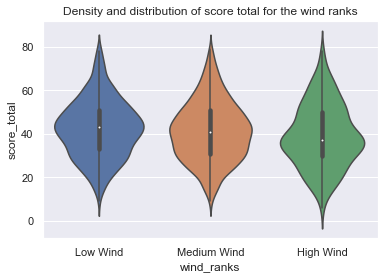

In [34]:
violin_data = df_wind_ranks

viz=sns.violinplot(data = violin_data, x = 'wind_ranks', y = 'score_total')
viz.set_title('Density and distribution of score total for the wind ranks')

### Linear Regression

In [35]:
df_pred = df_no_outliers.copy()

In [36]:
df_pred = df_pred.drop(['score_total'], axis=1)

In [37]:
df_pred.head()

,spread_favorite,over_under_line,weather_wind_mph,log_score_total
0,1.0,40.0,7.0,3.367296
1,10.5,38.5,8.0,3.526361
2,6.0,39.5,7.0,4.007333
3,2.5,44.0,13.0,3.583519
4,3.5,44.0,9.0,3.713572


In [38]:
features = df_pred[['spread_favorite', 'over_under_line', 'weather_wind_mph']]
target = df_pred[['log_score_total']]

x = np.array(features)
y = np.array(target)

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=18)

In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
model.score(x_train, y_train)

0.07829622133839886

In [42]:
model.coef_

array([[ 0.00103585,  0.02208631, -0.0052407 ]])

In [43]:
model.intercept_

array([2.79353086])

In [44]:
y_hat = model.predict(x_train)

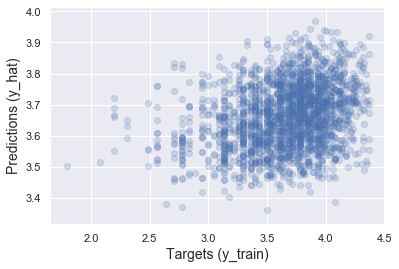

In [45]:
plt.scatter(y_train, y_hat, alpha=0.2)
plt.xlabel('Targets (y_train)', size=14)
plt.ylabel('Predictions (y_hat)', size=14)

plt.show()

Text(0.5, 1.0, 'Residual PDF')

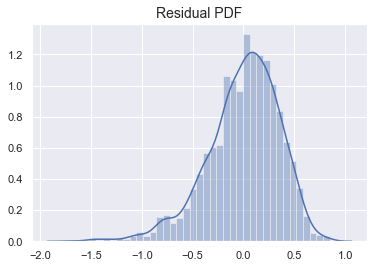

In [46]:
sns.distplot(y_train - y_hat)
plt.title('Residual PDF', size=14)

In [47]:
predictions = model.predict(x_test)

In [48]:
df_performance = pd.DataFrame(np.exp(predictions), columns=['Prediction'])
df_performance['Target'] = np.exp(y_test)
df_performance['Differance'] = df_performance['Target'] - df_performance['Prediction']
df_performance['Differance%'] = np.absolute(df_performance['Differance'] / df_performance['Target'] * 100)
df_performance.head(20)

,Prediction,Target,Differance,Differance%
0,34.934999,47.0,12.065001,25.670214
1,36.894893,50.0,13.105107,26.210214
2,38.503317,31.0,-7.503317,24.204250
3,38.360614,37.0,-1.360614,3.677336
4,46.252498,62.0,15.747502,25.399197
5,38.624515,31.0,-7.624515,24.595211
6,36.132054,35.0,-1.132054,3.234439
7,39.730818,26.0,-13.730818,52.810839
8,33.495325,53.0,19.504675,36.801274
9,44.404064,45.0,0.595936,1.324303


In [49]:
df_performance.describe()

,Prediction,Target,Differance,Differance%
count,251.000000,251.000000,251.000000,251.000000
mean,38.895141,42.601594,3.706452,27.799605
std,4.315713,13.502912,13.144700,26.764913
min,30.970971,15.000000,-27.815537,0.215747
25%,35.408304,33.000000,-5.245059,10.284484
50%,38.470876,43.000000,1.970151,23.091787
75%,42.085536,51.000000,13.754302,35.692032
max,50.236703,78.000000,36.201176,185.436912
